In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

import os
import copy

# os.chdir('/content/drive/MyDrive/Colab Notebooks/Shashank')

# os.chdir('/Users/shashanksule/Documents/TMDmaps')
# Regular Modules
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import datetime
import scipy.integrate as scint
#from numpy.random import default_rng
import numpy.ma as ma
import matplotlib.tri as tri
import scipy.io
import time 
from mpl_toolkits.mplot3d import axes3d
# parallelization modules 

from math import nan
from joblib import Parallel, delayed
import multiprocessing
import itertools
import sys
sys.path.append("/Users/shashanksule/Documents/TMDmaps/") # change this to your repo path

# # My Modules
import src.helpers as helpers
import src.model_systems as model_systems
import src.diffusion_map as dmap

In [4]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

# Fiddling with data

In [6]:

# Load metadynamics 
inData = scipy.io.loadmat(os.getcwd() + "/ground_data/Muller_Data_Metadynamics_longsample_20.mat") # to load metadynamics data, use "Muller_Data_FEM20_data20_Metadynamics.mat"
data = inData['samples']
metad_data = data.T
inData = scipy.io.loadmat(os.getcwd() + "/ground_data/Muller_Data_FEM20_data20_metadynamics.mat")
qFEM = inData['interpolant'].flatten()
data = np.delete(data, np.where(np.isnan(qFEM)), axis = 1) 
qFEM = np.delete(qFEM, np.where(np.isnan(qFEM))) # delete the points where qFEM is nan 


# # Load uniform 
inData = scipy.io.loadmat(os.getcwd() + "/ground_data/Muller_Data_Uniform.mat") # to load metadynamics data, use "Muller_Data_FEM20_data20_Metadynamics.mat"
data = inData['pts']
unif_data = data.T
# inData = scipy.io.loadmat("Muller_Data_FEM20_uniform.mat")
# qFEM = inData['interpolant'].flatten()
# data = np.delete(data, np.where(np.isnan(qFEM)), axis = 1) 
# qFEM = np.delete(qFEM, np.where(np.isnan(qFEM))) # delete the points where qFEM is nan 


# # Load boltzmann trajectory: for uniform data use value 'pts' 
dataset = 'FEM20_data20'
fname = f"Muller_Data_{dataset}.npz"
inData = np.load(os.getcwd() + '/ground_data/' + fname)
gibbs_data = inData['traj']
# qFEM = inData['fem_committor']
# data = data.T
# data = np.delete(data, np.where(np.isnan(qFEM)), axis = 1) 
# qFEM = np.delete(qFEM, np.where(np.isnan(qFEM))) # delete the points where qFEM is nan 

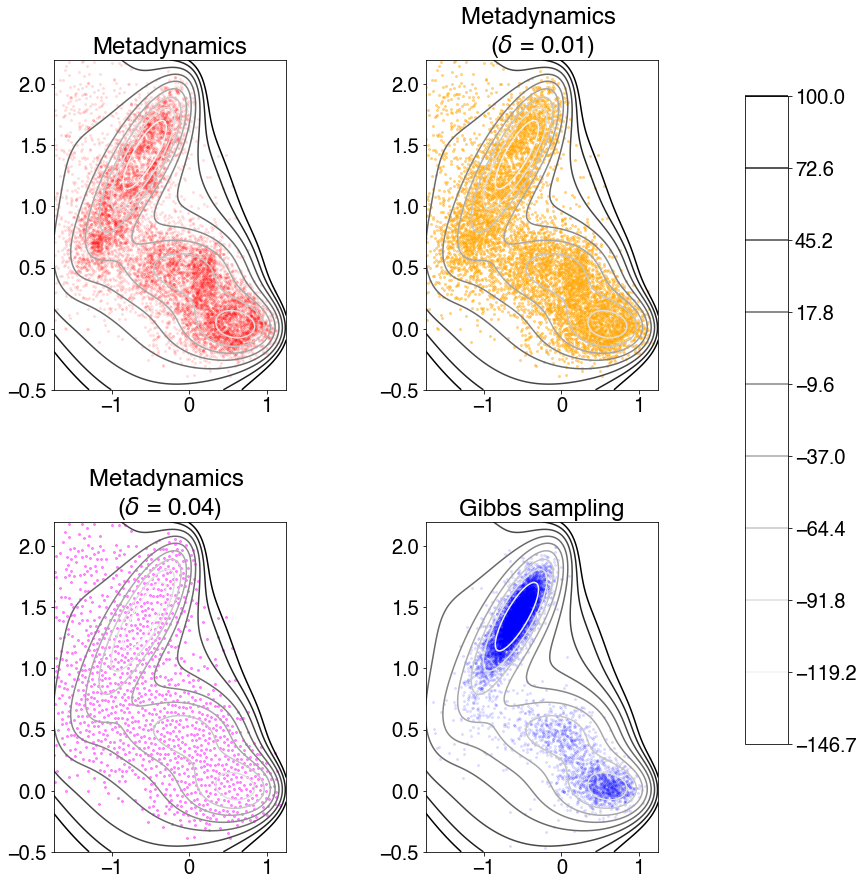

In [7]:
hfont = {'fontname':'Comic Sans MS'}
beta = 1/20
# Plot potential on a grid
# plt.clf()
xmin, xmax = -1.75, 1.25
ymin, ymax = -0.5, 2.20
nx, ny = 128, 128
volume = (xmax - xmin)*(ymax - ymin)
net_1 = helpers.epsilon_net(metad_data, 0.01)[0]
net_2 = helpers.epsilon_net(metad_data, 0.04)[0]

# Plot potential on a grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))
plot_params = [nx, ny, xmin, xmax, ymin, ymax]
[potential_grid, xx, yy] = helpers.gen_plot_data(helpers.potential, plot_params)
grid_min = np.min(potential_grid)
#print("grid minimum is: %d" % grid_min)
contour_levels = np.linspace(grid_min, 100, 10)
im = ax1.contour(xx, yy, potential_grid, cmap = 'Greys', levels=contour_levels)
ax1.scatter(metad_data[0,:], metad_data[1,:], c = 'red', alpha = 0.1, s=4.0)
ax1.set(title = "Metadynamics", xlim = (xmin,xmax),ylim = (ymin, ymax))
ax2.contour(xx, yy, potential_grid, cmap = 'Greys', levels=contour_levels)
ax2.scatter(metad_data[0,net_1], metad_data[1,net_1], c = 'orange', alpha = 0.4, s=4.0)
ax2.set(title = "Metadynamics \n($\delta$ = 0.01)", xlim = (xmin,xmax),ylim = (ymin, ymax))
ax3.contour(xx, yy, potential_grid, cmap = 'Greys', levels=contour_levels)
ax3.scatter(metad_data[0,net_2], metad_data[1,net_2], c = 'magenta', alpha = 0.4, s=4.0)
ax3.set(title = "Metadynamics \n($\delta$ = 0.04)", xlim = (xmin,xmax),ylim = (ymin, ymax))
ax4.contour(xx, yy, potential_grid, cmap = 'Greys', levels=contour_levels)
ax4.scatter(gibbs_data[:,0], gibbs_data[:,1], c = 'blue', alpha = 0.1, s=4.0)
ax4.set(title = "Gibbs sampling", xlim = (xmin,xmax),ylim = (ymin, ymax))
#plt.legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.6, 
                    hspace=0.4)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.90, 0.25, 0.05, 0.9])
fig.colorbar(im, cax=cbar_ax)
# plt.savefig("muller_density.pdf", bbox_inches="tight")
#plt.title("Muller's Potential")